In [1]:
import sv_utils
import torch 
import numpy as np
import pylab as plt
from matplotlib import pyplot
from matplotlib.pyplot import figure
from os.path import dirname, realpath
from singleNeuron import preSpikes, nextSpikes, STDPLIFDensePopulation, convergence_level, get_metrics, get_metrics_long_pat

## Sequence Visualizer

El proposito de esta notebook es el poder graficar tanto la entrada como salida de la red DSNN que reconoce patrones en una secuencia de numeros aleatorios.

In [2]:
Sin_tmp = np.load('./sequences/p_18/testing/15_0_0/layer_5_conv.pt')
print(Sin_tmp.shape)
Sin = np.reshape(Sin_tmp, (Sin_tmp.shape[0]*Sin_tmp.shape[1], Sin_tmp.shape[2]))
Sin = np.transpose(Sin)
print(Sin.shape)

NameError: name 'np' is not defined

### Tren de spikes de entrada

In [2]:
plt.rcParams["figure.figsize"] =(15,6)
#sv_utils.plotLIF(U=None, S=Sin[:200])
#print("Spikes: " + str(np.count_nonzero(Sin)))

### Tren de spikes de salida 

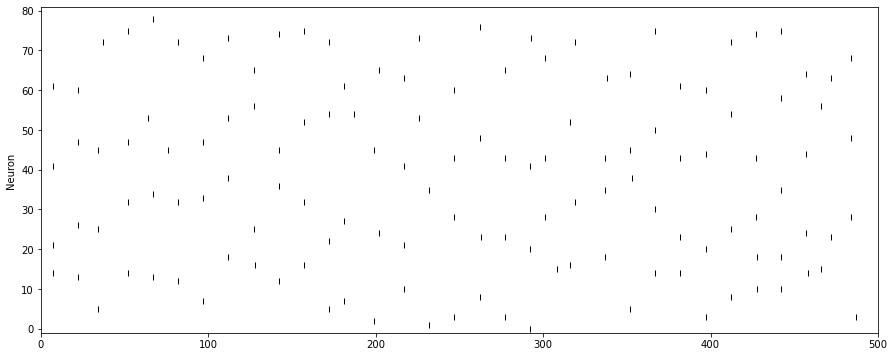

torch.Size([89970, 80])
Spikes: 24049


In [3]:
Sin_out_s = torch.load('../cleanDSNN/results/old_results/p_18/limited_spikes/training/15_0_0/layer_5_conv.pt')
sv_utils.plotLIF(U=None, S=Sin_out_s[:500].data.numpy())
print(Sin_out_s.shape)
print("Spikes: " + str(np.count_nonzero(Sin_out_s)))

## Entrenamos a la neurona de salida

In [20]:
#pat_times = np.load('./sequences/p_18/training/pat_p_18.npy')
Sin = Sin_out_s.clone().detach()
T = Sin.shape[0]
N_out = 1
N_in = Sin.shape[1]
th = 3.

singleNeuron = STDPLIFDensePopulation(in_channels=N_in, out_channels=N_out,
                                        weight=0.70, alpha=float(np.exp(-1e-3/10e-3)),
                                        beta=float(np.exp(-1e-3/2e-5)), delay=0,
                                        th=th, a_plus=.009125, a_minus=.0125625,
                                        w_max=1.)


# Pre-procesamos PSpikes y NSpikes
dt_ltp = 20  # Cantidad de timesteps que miro hacia atras
dt_ltd = 70  # Cantidad de timesteps que miro hacia delante
PSpikes = preSpikes(T, dt_ltp, torch.zeros(T, N_in), Sin)
NSpikes = nextSpikes(T, dt_ltd, torch.zeros(T, N_in), Sin)

# Realizamos el entrenamiento STDP
Uprobe = np.empty([T, N_out])
Iprobe = np.empty([T, N_out])
Sprobe = np.empty([T, N_out])

n = 0
t = 0
c_l = 1.
while (c_l > 0.01) and (t < 300000):
    state = singleNeuron.forward(Sin[n].unsqueeze(0), PSpikes[n], NSpikes[n-1])
    Uprobe[n] = state.U.data.numpy()
    Iprobe[n] = state.I.data.numpy()
    Sprobe[n] = state.S.data.numpy()
    n += 1
    if n >= T:
        n = 0
    c_l = convergence_level(singleNeuron.fc_layer.weight[0])
    t += 1
    if (t % 500) == 0:
        print("iter: " + str(t) + " convergence: " + str(c_l))


iter: 500 convergence: 0.21134839086423804
iter: 1000 convergence: 0.2125691588754072
iter: 1500 convergence: 0.21342297005117863
iter: 2000 convergence: 0.21436025450117818
iter: 2500 convergence: 0.2156560912753128
iter: 3000 convergence: 0.21673254802081998
iter: 3500 convergence: 0.2178825087161051
iter: 4000 convergence: 0.21876159530883932
iter: 4500 convergence: 0.21959824042011328
iter: 5000 convergence: 0.2204071027397058
iter: 5500 convergence: 0.2212630248732324
iter: 6000 convergence: 0.22192694030114843
iter: 6500 convergence: 0.22283270202728084
iter: 7000 convergence: 0.2234000069544289
iter: 7500 convergence: 0.22360551588723115
iter: 8000 convergence: 0.2241426225096445
iter: 8500 convergence: 0.22476234937395995
iter: 9000 convergence: 0.22498802540594878
iter: 9500 convergence: 0.22513321026031155
iter: 10000 convergence: 0.2252369280193367
iter: 10500 convergence: 0.2255639046012941
iter: 11000 convergence: 0.22557702800473517
iter: 11500 convergence: 0.225871630053

iter: 92500 convergence: 0.10730714401213974
iter: 93000 convergence: 0.10708713969889283
iter: 93500 convergence: 0.10687795564785763
iter: 94000 convergence: 0.10637081450635048
iter: 94500 convergence: 0.10619226426447556
iter: 95000 convergence: 0.1052175348050779
iter: 95500 convergence: 0.10570230554003335
iter: 96000 convergence: 0.10551820882201453
iter: 96500 convergence: 0.10439394598849865
iter: 97000 convergence: 0.10402015089738029
iter: 97500 convergence: 0.10360174822995591
iter: 98000 convergence: 0.10303884213128187
iter: 98500 convergence: 0.10208565006271417
iter: 99000 convergence: 0.10249984094202498
iter: 99500 convergence: 0.10216535447362937
iter: 100000 convergence: 0.10131980260716192
iter: 100500 convergence: 0.10141547405322253
iter: 101000 convergence: 0.10068876527880137
iter: 101500 convergence: 0.10085711167539439
iter: 102000 convergence: 0.09965634073307642
iter: 102500 convergence: 0.09967280216907727
iter: 103000 convergence: 0.09952643544120622
iter

iter: 182500 convergence: 0.06051832554012513
iter: 183000 convergence: 0.059993525022595695
iter: 183500 convergence: 0.05956724504058543
iter: 184000 convergence: 0.059264048207440814
iter: 184500 convergence: 0.059375709170496394
iter: 185000 convergence: 0.05868854210164613
iter: 185500 convergence: 0.05956149931980668
iter: 186000 convergence: 0.05968851625246746
iter: 186500 convergence: 0.05945280953358752
iter: 187000 convergence: 0.05886341218233114
iter: 187500 convergence: 0.058442658968254645
iter: 188000 convergence: 0.05827353247602415
iter: 188500 convergence: 0.05793676611635916
iter: 189000 convergence: 0.05822313569081551
iter: 189500 convergence: 0.05734848845917345
iter: 190000 convergence: 0.056591434498814576
iter: 190500 convergence: 0.0572752251825487
iter: 191000 convergence: 0.057424595501273455
iter: 191500 convergence: 0.05748055972392713
iter: 192000 convergence: 0.05700783753597697
iter: 192500 convergence: 0.057059105047495395
iter: 193000 convergence: 0.

iter: 272000 convergence: 0.04010064261684125
iter: 272500 convergence: 0.03998924679557513
iter: 273000 convergence: 0.03991696351774953
iter: 273500 convergence: 0.03948428846759322
iter: 274000 convergence: 0.03909739267599696
iter: 274500 convergence: 0.03917939746651231
iter: 275000 convergence: 0.03870369881080011
iter: 275500 convergence: 0.03939242651791351
iter: 276000 convergence: 0.03957939081126243
iter: 276500 convergence: 0.039174926640496766
iter: 277000 convergence: 0.03873770092450461
iter: 277500 convergence: 0.0382182687284573
iter: 278000 convergence: 0.03814509382296431
iter: 278500 convergence: 0.03799094388118323
iter: 279000 convergence: 0.03812567732258092
iter: 279500 convergence: 0.037457019331799665
iter: 280000 convergence: 0.03656786055491455
iter: 280500 convergence: 0.03700999112613261
iter: 281000 convergence: 0.03774916587039707
iter: 281500 convergence: 0.037885168257957944
iter: 282000 convergence: 0.037645264316693364
iter: 282500 convergence: 0.037

## Graficamos la salida para la secuencia de testing y mostramos metricas

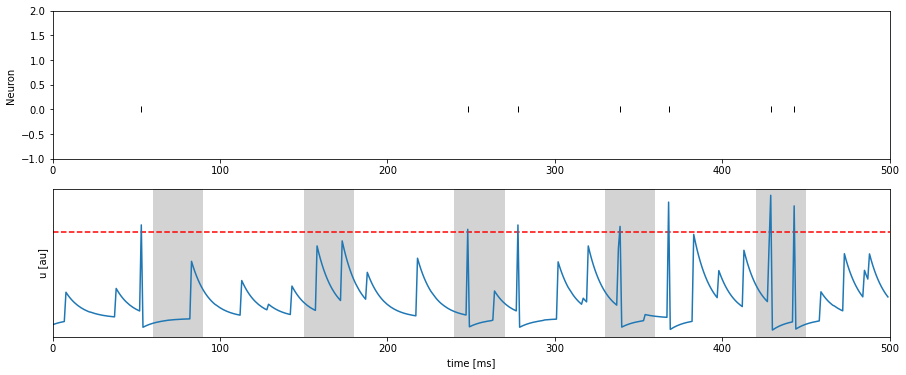

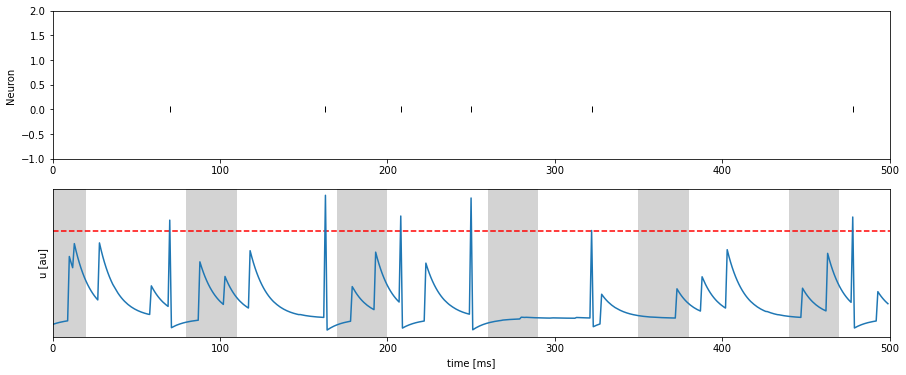

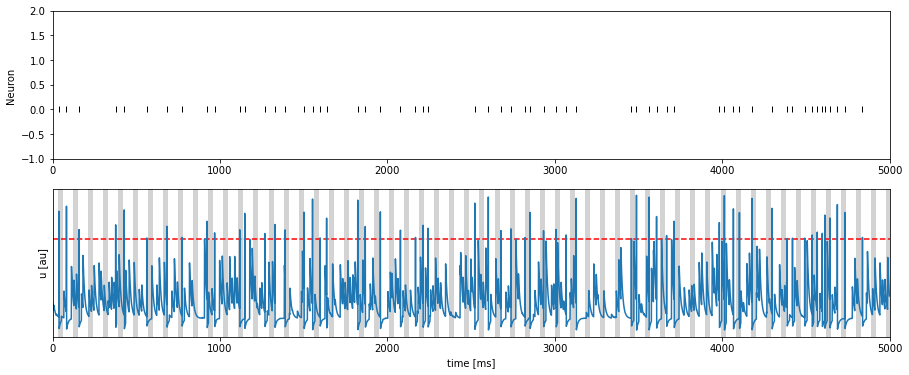

accuracy: 0.6136401534100383
precision: 0.3357363542739444
recall: 0.16316316316316315
f1: 0.2196025597844392
fake_alarms: 0.16129032258064516
missed_alarms: 0.8368368368368369


In [21]:
pat_times = np.load('./sequences/p_18/training/pat_p_18.npy')
Sin_tmp = torch.load('../cleanDSNN/results/old_results/p_18/limited_spikes/15_0_0/training/layer_5_conv.pt')
T = Sin_tmp.shape[0]
N_out = 1
N_in = Sin_tmp.shape[1]
th = 3.

Sin = Sin_tmp.clone().detach()

# Realizamos el entrenamiento STDP
Uprobe = np.empty([T, N_out])
Iprobe = np.empty([T, N_out])
Sprobe = np.empty([T, N_out])
for n in range(T):
    state = singleNeuron.forward_no_learning(Sin[n].unsqueeze(0))
    Uprobe[n] = state.U.data.numpy()
    Iprobe[n] = state.I.data.numpy()
    Sprobe[n] = state.S.data.numpy()
    
sv_utils.plotLIF(U=Uprobe[0:500], S=Sprobe[0:500], pat_times=pat_times[0:500], th=th)
sv_utils.plotLIF(U=Uprobe[2500:3000], S=Sprobe[2500:3000], pat_times=pat_times[2500:3000], th=th)
sv_utils.plotLIF(U=Uprobe[30000:35000], S=Sprobe[30000:35000], pat_times=pat_times[30000:35000], th=th)


accuracy, precision, recall, f1, fake_alarms, missed_alarms = get_metrics(T - 15, pat_times, Sprobe)
print("accuracy: " + str(accuracy))
print("precision: " + str(precision))
print("recall: " + str(recall))
print("f1: " + str(f1))
print("fake_alarms: " + str(fake_alarms))
print("missed_alarms: " + str(missed_alarms))

# Parallel Architecture

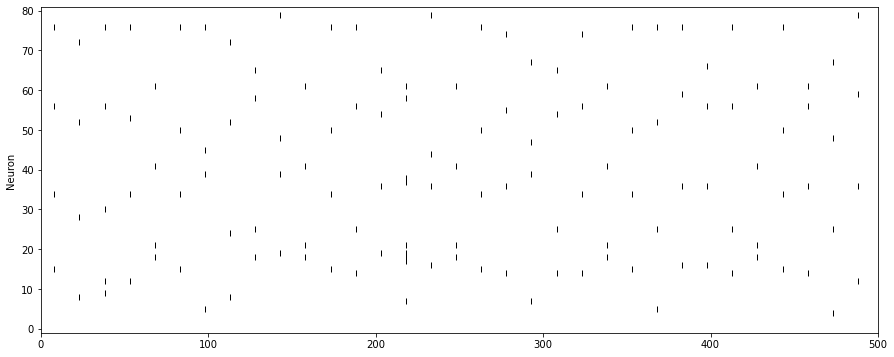

torch.Size([89970, 80])
Sequential Spikes: 24350


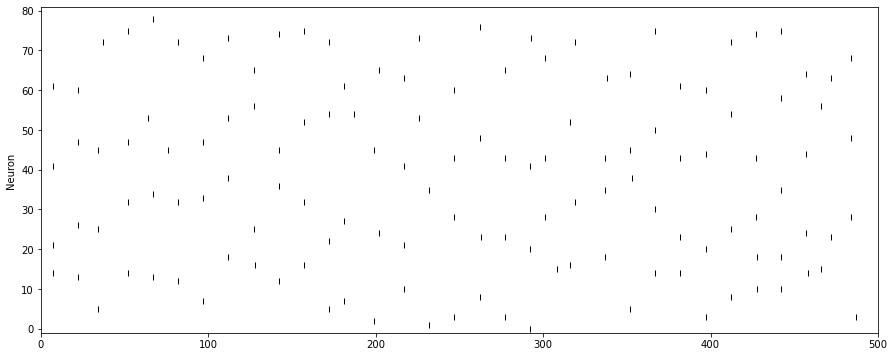

torch.Size([89970, 80])
Parallel Spikes: 24049


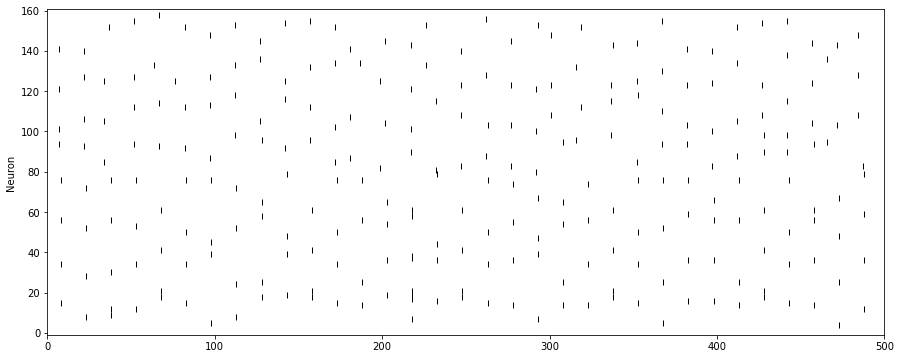

torch.Size([89970, 160])
Combined Spikes: 48399


In [4]:
Sin_out_seq = torch.load('../cleanDSNN/results/old_results/p_18/unlimited_spikes/free_spikes/training/0_0_0/layer_5_conv.pt')
sv_utils.plotLIF(U=None, S=Sin_out_seq[:500].data.numpy())
print(Sin_out_seq.shape)
print("Sequential Spikes: " + str(np.count_nonzero(Sin_out_seq)))

Sin_out_par = torch.load('../cleanDSNN/results/old_results/p_18/limited_spikes/15_0_0/training/layer_5_conv.pt')
sv_utils.plotLIF(U=None, S=Sin_out_par[:500].data.numpy())
print(Sin_out_par.shape)
print("Parallel Spikes: " + str(np.count_nonzero(Sin_out_par)))

combined_out = torch.cat((Sin_out_seq, Sin_out_par), 1)
sv_utils.plotLIF(U=None, S=combined_out[:500].data.numpy())
print(combined_out.shape)
print("Combined Spikes: " + str(np.count_nonzero(combined_out)))

# Realizamos el entrenamiento

In [12]:
Sin = combined_out.clone().detach()
T = Sin.shape[0]
N_out = 1
N_in = Sin.shape[1]
th = 4.

singleNeuron = STDPLIFDensePopulation(in_channels=N_in, out_channels=N_out,
                                        weight=0.70, alpha=float(np.exp(-1e-3/10e-3)),
                                        beta=float(np.exp(-1e-3/2e-5)), delay=0,
                                        th=th, a_plus=.009125, a_minus=.0125625,
                                        w_max=1.)


# Pre-procesamos PSpikes y NSpikes
dt_ltp = 20  # Cantidad de timesteps que miro hacia atras
dt_ltd = 70  # Cantidad de timesteps que miro hacia delante
PSpikes = preSpikes(T, dt_ltp, torch.zeros(T, N_in), Sin)
NSpikes = nextSpikes(T, dt_ltd, torch.zeros(T, N_in), Sin)

# Realizamos el entrenamiento STDP
Uprobe = np.empty([T, N_out])
Iprobe = np.empty([T, N_out])
Sprobe = np.empty([T, N_out])

n = 0
t = 0
c_l = 1.
while (c_l > 0.01) and (t < 300000):
    state = singleNeuron.forward(Sin[n].unsqueeze(0), PSpikes[n], NSpikes[n-1])
    Uprobe[n] = state.U.data.numpy()
    Iprobe[n] = state.I.data.numpy()
    Sprobe[n] = state.S.data.numpy()
    n += 1
    if n >= T:
        n = 0
    c_l = convergence_level(singleNeuron.fc_layer.weight[0])
    t += 1
    if (t % 500) == 0:
        print("iter: " + str(t) + " convergence: " + str(c_l))

iter: 500 convergence: 0.21260212093936462
iter: 1000 convergence: 0.21502311327603935
iter: 1500 convergence: 0.21627316628666565
iter: 2000 convergence: 0.21802566977968424
iter: 2500 convergence: 0.21963488361373118
iter: 3000 convergence: 0.22073073729380965
iter: 3500 convergence: 0.2215994097630448
iter: 4000 convergence: 0.2221142206217012
iter: 4500 convergence: 0.22175666813600606
iter: 5000 convergence: 0.222013417720527
iter: 5500 convergence: 0.22201687707687112
iter: 6000 convergence: 0.22136332840776235
iter: 6500 convergence: 0.2207894147113958
iter: 7000 convergence: 0.2200418761838927
iter: 7500 convergence: 0.21987507444894164
iter: 8000 convergence: 0.22021599335733805
iter: 8500 convergence: 0.22049607956667155
iter: 9000 convergence: 0.220672982439942
iter: 9500 convergence: 0.2206038775039306
iter: 10000 convergence: 0.22060092005785684
iter: 10500 convergence: 0.22053595437912996
iter: 11000 convergence: 0.2201794652986556
iter: 11500 convergence: 0.2202682566229

iter: 92500 convergence: 0.13265606399707458
iter: 93000 convergence: 0.13256603599835165
iter: 93500 convergence: 0.13232395555886117
iter: 94000 convergence: 0.13204172120757326
iter: 94500 convergence: 0.13187347026697002
iter: 95000 convergence: 0.13154525252152688
iter: 95500 convergence: 0.13136989126144522
iter: 96000 convergence: 0.1306802995655517
iter: 96500 convergence: 0.1306432222767827
iter: 97000 convergence: 0.13043447907818673
iter: 97500 convergence: 0.13052870753400378
iter: 98000 convergence: 0.13070229554780488
iter: 98500 convergence: 0.13054607200237597
iter: 99000 convergence: 0.13004836283044272
iter: 99500 convergence: 0.12976833845128574
iter: 100000 convergence: 0.12961702273999254
iter: 100500 convergence: 0.12953072264905224
iter: 101000 convergence: 0.12938158457293109
iter: 101500 convergence: 0.1291587898035219
iter: 102000 convergence: 0.12892789358581203
iter: 102500 convergence: 0.1289919607540865
iter: 103000 convergence: 0.1283118487521413
iter: 10

iter: 182500 convergence: 0.10168352456657544
iter: 183000 convergence: 0.10170792596709739
iter: 183500 convergence: 0.1016922793943563
iter: 184000 convergence: 0.10156784986392249
iter: 184500 convergence: 0.10135253782148734
iter: 185000 convergence: 0.10100519303849238
iter: 185500 convergence: 0.10084563048942022
iter: 186000 convergence: 0.10033277459386561
iter: 186500 convergence: 0.10023973548342335
iter: 187000 convergence: 0.10017722251010967
iter: 187500 convergence: 0.10045463546731284
iter: 188000 convergence: 0.10079175364087009
iter: 188500 convergence: 0.10109605594376643
iter: 189000 convergence: 0.10075501404263969
iter: 189500 convergence: 0.1007520193471323
iter: 190000 convergence: 0.10108091053964008
iter: 190500 convergence: 0.10082115169833612
iter: 191000 convergence: 0.10089853224800498
iter: 191500 convergence: 0.10068761697601925
iter: 192000 convergence: 0.10064410858600126
iter: 192500 convergence: 0.10104877637390794
iter: 193000 convergence: 0.10072285

iter: 272000 convergence: 0.08963582053710341
iter: 272500 convergence: 0.08973876755339233
iter: 273000 convergence: 0.08972261688782457
iter: 273500 convergence: 0.08972224648335814
iter: 274000 convergence: 0.08967941457508227
iter: 274500 convergence: 0.08938781306042333
iter: 275000 convergence: 0.08925464384642741
iter: 275500 convergence: 0.08905409154966908
iter: 276000 convergence: 0.0886293217320879
iter: 276500 convergence: 0.08858112821553604
iter: 277000 convergence: 0.08850705208686595
iter: 277500 convergence: 0.08886843361604496
iter: 278000 convergence: 0.08917460000309277
iter: 278500 convergence: 0.08948169050394522
iter: 279000 convergence: 0.08924900453988814
iter: 279500 convergence: 0.08913127631728564
iter: 280000 convergence: 0.08944032888834284
iter: 280500 convergence: 0.08920433178834632
iter: 281000 convergence: 0.0892821015969803
iter: 281500 convergence: 0.08902879518236109
iter: 282000 convergence: 0.08906442168673909
iter: 282500 convergence: 0.08922527

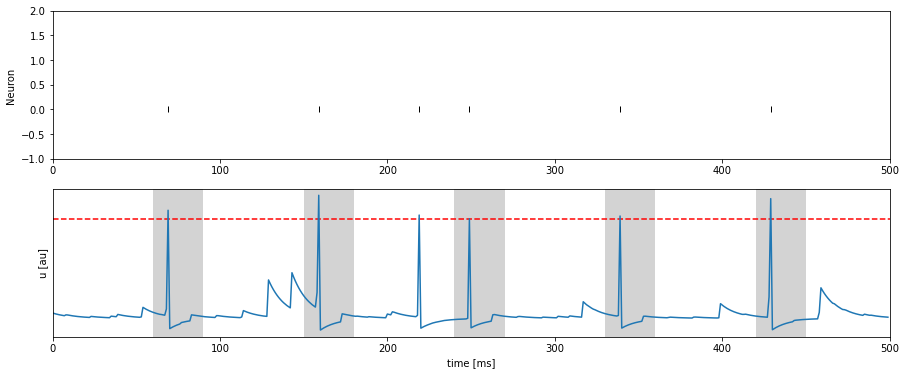

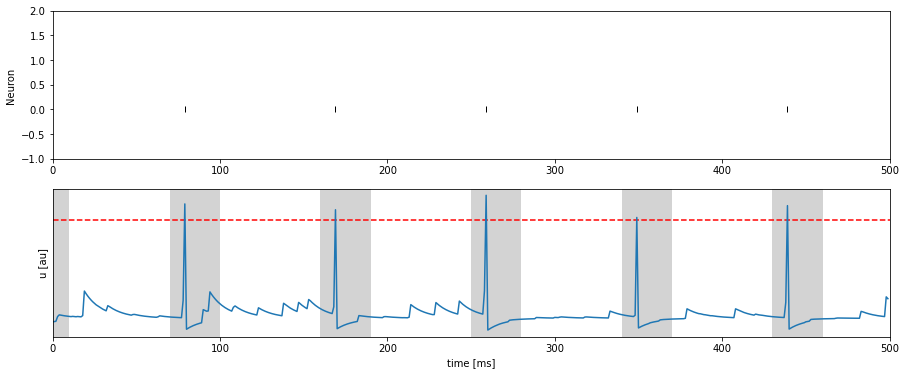

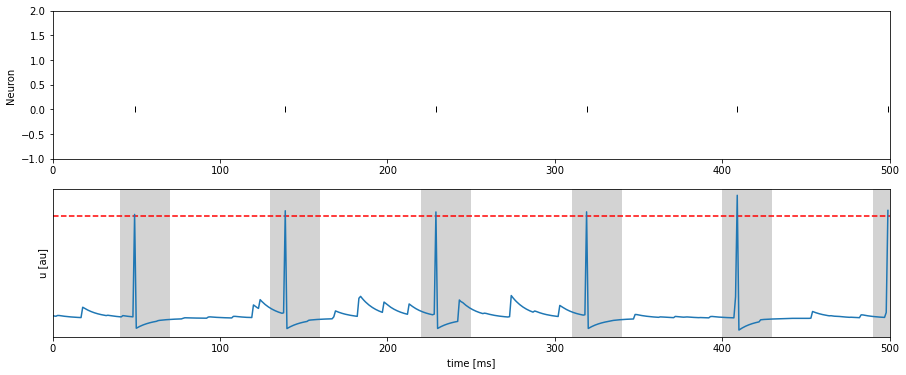

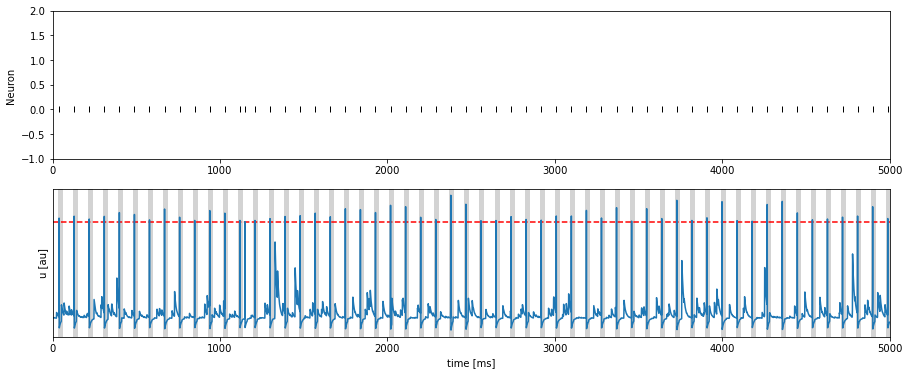

accuracy: 0.9971988795518207
precision: 0.9861796643632774
recall: 1.0
f1: 0.9930417495029821
fake_alarms: 0.003500875218804701
missed_alarms: 0.0
fake_spikes_numbers: [(19, 15, 0, 1), (12, 9, 1, 33), (16, 22, 1, 38), (20, 15, 0, 81), (16, 21, 0, 245), (14, 16, 1, 259), (19, 10, 0, 301), (13, 26, 0, 379), (13, 27, 1, 429), (10, 16, 0, 538), (14, 22, 1, 558), (12, 23, 0, 631), (13, 23, 1, 633), (15, 20, 1, 673)]


In [16]:
pat_times = np.load('./sequences/p_18/training/pat_p_18.npy')
pat_number = np.load('./sequences/p_18/training/data_p_18.npy')
Sin_tmp_seq = torch.load('../cleanDSNN/results/old_results/p_18/unlimited_spikes/free_spikes/training/0_0_0/layer_5_conv.pt')
Sin_tmp_par = torch.load('../cleanDSNN/results/old_results/p_18/limited_spikes/15_0_0/training/layer_5_conv.pt')

Sin_tmp = torch.cat((Sin_tmp_seq, Sin_tmp_par), 1)
T = Sin_tmp.shape[0]
N_out = 1
N_in = Sin_tmp.shape[1]
th = 4.

Sin = Sin_tmp.clone().detach()

# Realizamos el entrenamiento STDP
Uprobe = np.empty([T, N_out])
Iprobe = np.empty([T, N_out])
Sprobe = np.empty([T, N_out])
for n in range(T):
    state = singleNeuron.forward_no_learning(Sin[n].unsqueeze(0))
    Uprobe[n] = state.U.data.numpy()
    Iprobe[n] = state.I.data.numpy()
    Sprobe[n] = state.S.data.numpy()
    

sv_utils.plotLIF(U=Uprobe[0:500], S=Sprobe[0:500], pat_times=pat_times[0:500], th=th)
sv_utils.plotLIF(U=Uprobe[8000:8500], S=Sprobe[8000:8500], pat_times=pat_times[8000:8500], th=th)
sv_utils.plotLIF(U=Uprobe[20000:20500], S=Sprobe[20000:20500], pat_times=pat_times[20000:20500], th=th)
sv_utils.plotLIF(U=Uprobe[30000:35000], S=Sprobe[30000:35000], pat_times=pat_times[30000:35000], th=th)


accuracy, precision, recall, f1, fake_alarms, missed_alarms, fake_spikes_numbers = get_metrics_long_pat(T - 15, pat_times, Sprobe, 30, pat_number)
print("accuracy: " + str(accuracy))
print("precision: " + str(precision))
print("recall: " + str(recall))
print("f1: " + str(f1))
print("fake_alarms: " + str(fake_alarms))
print("missed_alarms: " + str(missed_alarms))
print("fake_spikes_numbers: " + str(fake_spikes_numbers))